<a href="https://colab.research.google.com/github/GradyRoberts/mice-proteins/blob/master/Mouse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mice classification

In [0]:
%%capture
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get data

In [0]:
# Download data from Github
data_url = 'https://raw.githubusercontent.com/GradyRoberts/mice-proteins/master/Data_Cortex_Nuclear.csv'
data = pd.read_csv(data_url)

# Drop unused columns and shuffle data
data = data.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis=1)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

features = data.drop(['class'], axis=1)
target = data['class']

# Split numeric/text data
num_cols = features.select_dtypes(include='number').columns
txt_cols = features.select_dtypes(exclude='number').columns

## Visualize data

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


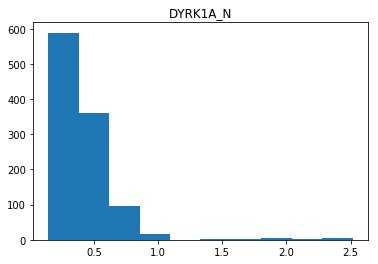

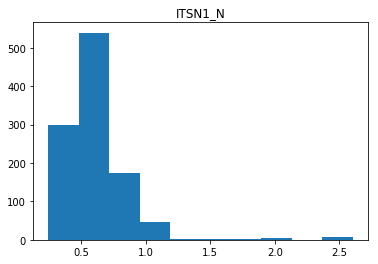

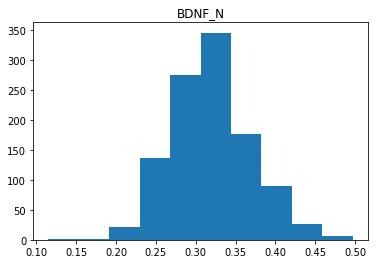

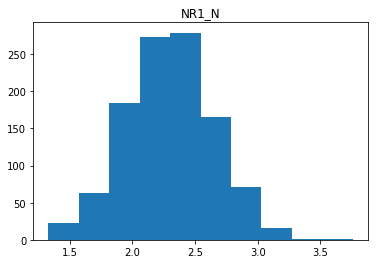

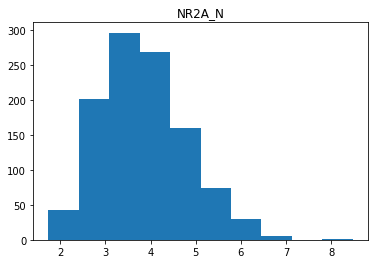

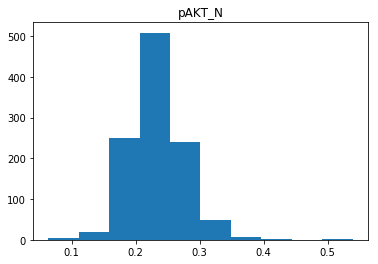

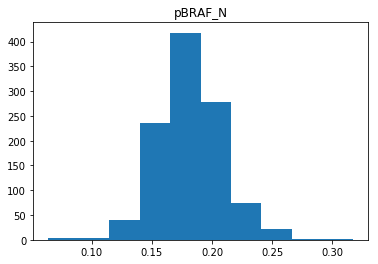

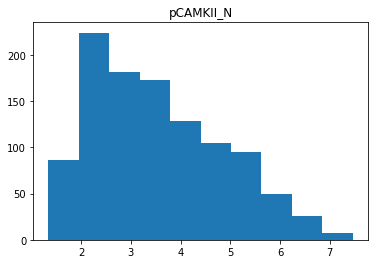

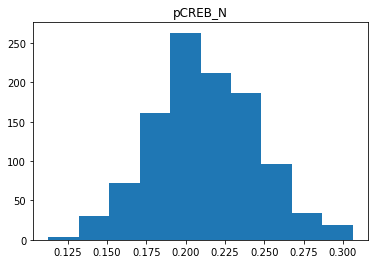

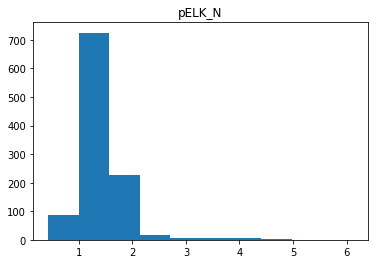

In [0]:
data_num = data[num_cols]

for ind in range(10):
  plt.hist(data_num.iloc[:,ind])
  plt.title(num_cols[ind])
  plt.show()

## Create model
Logistic regression classifier with L1 regularization trained using SGD (which should allow parallelization). Log loss allows for outputting class probabilities and L1 regularization should perform feature selection.

In [0]:
# Fill missing values and scale
imputer = SimpleImputer()
scaler = StandardScaler()

preprocess = make_column_transformer(
  (make_pipeline(imputer, scaler), num_cols),
  remainder='drop'
)

# Create model pipeline
classifier = SGDClassifier(loss='log', penalty='l1', max_iter=1000, tol=0.001)

model = make_pipeline(
  preprocess,
  classifier
)

## Test model
Split train and test data, fit model, and calculate F1-score to evaluate performance.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, test_size=0.2, 
                                                    random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
print('F1-score:', f1)

F1-score: 0.9906249951906282


Use cross-validation to evaluate performance

In [0]:
print(cross_val_score(model, X_train, y_train, cv=5))

[0.98863636 0.99425287 0.97687861 0.97674419 0.98224852]


Can output class probabilities for a given sample

In [0]:
prob_predictions = model.predict_proba(X_test)
prob_predictions[:5]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[1.00000000e+000, 2.23762743e-085, 1.00299462e-294,
        6.62665616e-059, 1.35713946e-053, 2.31736422e-191,
        0.00000000e+000, 0.00000000e+000],
       [1.23935585e-127, 2.35851823e-274, 5.73571589e-190,
        5.66755096e-099, 7.81013432e-264, 3.47722963e-120,
        1.35842596e-141, 1.00000000e+000],
       [3.94111519e-260, 0.00000000e+000, 1.04605882e-104,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.30202840e-018, 1.82772177e-267],
       [6.04498691e-051, 1.00000000e+000, 5.45317098e-272,
        6.68361512e-143, 4.07282653e-054, 1.74821307e-059,
        2.62915750e-260, 2.05768987e-114],
       [9.76896622e-226, 0.00000000e+000, 2.46857816e-062,
        1.68737427e-135, 2.00282062e-284, 5.18427215e-154,
        1.00000000e+000, 8.80064802e-137]])

Using L1 norm did not send most parameter weights to 0 as expected.

In [0]:
model.named_steps['sgdclassifier'].coef_

array([[-1.14693466e+01, -4.78569007e+01,  1.51851544e+01,
        -1.07969959e+00,  4.64770947e+01, -2.22204881e+01,
         3.96165996e+01, -9.87251408e+01, -1.27741699e+02,
        -2.19598369e+01,  3.22442224e+01,  1.16748513e+02,
         8.69043435e+01,  3.91544719e+01,  2.03695047e+01,
        -3.09845159e+01, -9.01690542e+01, -4.65084826e+01,
         6.92515691e-01,  1.87717096e+01, -9.90687458e+00,
        -3.55341015e+01, -2.83983457e+01,  3.64775814e+01,
         9.08951412e+01,  7.82940817e+00,  2.55010285e+01,
        -5.96201032e+01, -1.16639025e+01, -6.62490623e+00,
        -4.83984599e+01, -1.18052855e+01, -4.71264679e+01,
         6.56716328e+01, -3.05440772e+01, -1.54136991e+01,
        -3.05046348e+01,  5.34156731e+00,  2.48788997e+01,
         7.71581850e+01,  2.38189866e+01, -4.83496225e+01,
        -4.60250894e+01, -3.17210831e+01, -7.49333921e+01,
         2.24342949e+01, -8.96986875e+00,  4.06684302e+01,
         1.15420810e+01, -1.53604375e+01,  1.51701977e+0